In [3]:
import os
import csv
import pandas as pd
import numpy as np
from datetime import datetime



The packages here below are needed for visualizations, such as Matplotlib, Seaborn, and Plotly:


In [31]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import cm
import seaborn as sns
import pylab



In [4]:
df = pd.read_csv('\\Users\\GTX8WNS\\Desktop\\SMU\\Data Mining\\KobeCompletedos.csv')
df
print df.head()

         action_type combined_shot_type  type  game_event_id   game_id  \
0          Jump Shot          Jump Shot     1             12  20000012   
1          Jump Shot          Jump Shot     1             35  20000012   
2          Jump Shot          Jump Shot     1             43  20000012   
3  Driving Dunk Shot               Dunk     3            155  20000012   
4          Jump Shot          Jump Shot     1            244  20000012   

       lat  loc_x  loc_y       lon  minutes_remaining   ...         shot_type  \
0  34.0443   -157      0 -118.4268                 10   ...    2PT Field Goal   
1  33.9093   -101    135 -118.3708                  7   ...    2PT Field Goal   
2  33.8693    138    175 -118.1318                  6   ...    2PT Field Goal   
3  34.0443      0      0 -118.2698                  6   ...    2PT Field Goal   
4  34.0553   -145    -11 -118.4148                  9   ...    2PT Field Goal   

          shot_zone_area  shot_zone_basic  shot_zone_range     team_

In [8]:
os.getcwd()

'C:\\Users\\GTX8WNS'

In [36]:
#DATA UNDERSTANDING : 2.Describe the meaning and type of data (scale, values, etc.) for each
#attribute in the data file.
df.columns
df.index
df.values
df.dtypes
df.describe

action_type            object
combined_shot_type     object
type                    int64
game_event_id           int64
game_id                 int64
lat                   float64
loc_x                   int64
loc_y                   int64
lon                   float64
minutes_remaining       int64
period                  int64
playoffs                int64
season                 object
seconds_remaining       int64
shot_distance           int64
shot_made_flag          int64
shot_type              object
shot_zone_area         object
shot_zone_basic        object
shot_zone_range        object
team_id                 int64
team_name              object
game_date              object
matchup                object
opponent               object
shot_id                 int64
dtype: object

In [37]:
df.count()


action_type           25696
combined_shot_type    25696
type                  25696
game_event_id         25696
game_id               25696
lat                   25696
loc_x                 25696
loc_y                 25696
lon                   25696
minutes_remaining     25696
period                25696
playoffs              25696
season                25696
seconds_remaining     25696
shot_distance         25696
shot_made_flag        25696
shot_type             25696
shot_zone_area        25696
shot_zone_basic       25696
shot_zone_range       25696
team_id               25696
team_name             25696
game_date             25696
matchup               25696
opponent              25696
shot_id               25696
dtype: int64

In [86]:
# DATA UNDERSTANDING: #3. Verify data quality: Explain any missing values, duplicate data, and outliers.
# Are those mistakes? How do you deal with these problems? Be specific.

# The following command will indicate those cells with "True" where there is a missing value
pd.isnull(df).head(3)

# There is a simple way to check the number of missing values per variable, using the function
df.isnull().sum()

# The inverse is also possible, that is counting the number of nonmissing values.
df.count()

# To remove the Ouliers for each of your dataframe column, you could get quantile and then filter
q = df["minutes_remaining"].quantile(0.99)
df[df["minutes_remaining"] < q]

,action_type,combined_shot_type,type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,1,12,20000012,34.0443,-157,0,-118.4268,10,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,10/31/2000,LAL @ POR,POR,2
1,Jump Shot,Jump Shot,1,35,20000012,33.9093,-101,135,-118.3708,7,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,10/31/2000,LAL @ POR,POR,3
2,Jump Shot,Jump Shot,1,43,20000012,33.8693,138,175,-118.1318,6,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,10/31/2000,LAL @ POR,POR,4
3,Driving Dunk Shot,Dunk,3,155,20000012,34.0443,0,0,-118.2698,6,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,10/31/2000,LAL @ POR,POR,5
4,Jump Shot,Jump Shot,1,244,20000012,34.0553,-145,-11,-118.4148,9,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,10/31/2000,LAL @ POR,POR,6
5,Layup Shot,Layup,2,251,20000012,34.0443,0,0,-118.2698,8,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,10/31/2000,LAL @ POR,POR,7
6,Jump Shot,Jump Shot,1,265,20000012,33.9363,-65,108,-118.3348,6,...,2PT Field Goal,Left Side(L),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,10/31/2000,LAL @ POR,POR,9
7,Running Jump Shot,Jump Shot,1,294,20000012,33.9193,-33,125,-118.3028,3,...,2PT Field Goal,Center(C),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,10/31/2000,LAL @ POR,POR,10
8,Jump Shot,Jump Shot,1,309,20000012,33.8063,-94,238,-118.3638,1,...,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,10/31/2000,LAL @ POR,POR,11
10,Running Jump Shot,Jump Shot,1,27,20000019,33.9343,-67,110,-118.3368,7,...,2PT Field Goal,Left Side(L),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,11/1/2000,LAL vs. UTA,UTA,13


In [105]:
# DATA UNDERSTANDING: #4 Give simple, appropriate statistics (range, mode, mean, median, variance,
# counts, etc.) for the most important attributes and describe what they mean or if you
# found something interesting. Note: You can also use data from other sources for
# comparison. Explain the significance of the statistics run and why they are meaningful.

df.describe(include='all')
df.describe(include =['number'])
df.describe(include=['object', 'category'])

,action_type,combined_shot_type,type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
count,25696,25696,25696.000000,25696.000000,2.569600e+04,25696.000000,25696.000000,25696.000000,25696.000000,25696.000000,...,25696,25696,25696,25696,2.569600e+04,25696,25696,25696,25696,25696.000000
unique,55,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,6,7,5,NaN,1,1558,74,33,NaN
top,Jump Shot,Jump Shot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2PT Field Goal,Center(C),Mid-Range,Less Than 8 ft.,NaN,Los Angeles Lakers,4/13/2016,LAL @ SAS,SAS,NaN
freq,15836,19710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20284,11288,10532,7856,NaN,25696,43,853,1638,NaN
mean,NaN,NaN,1.321879,249.357059,2.474128e+07,33.953039,7.148700,91.260897,-118.262651,4.886714,...,NaN,NaN,NaN,NaN,1.610613e+09,NaN,NaN,NaN,NaN,15328.757900
std,NaN,NaN,0.711421,149.775409,7.738202e+06,0.088152,110.075279,88.151983,0.110075,3.452517,...,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,8860.128375
min,NaN,NaN,1.000000,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,...,NaN,NaN,NaN,NaN,1.610613e+09,NaN,NaN,NaN,NaN,2.000000
25%,NaN,NaN,1.000000,111.000000,2.050006e+07,33.884300,-67.250000,4.000000,-118.337050,2.000000,...,NaN,NaN,NaN,NaN,1.610613e+09,NaN,NaN,NaN,NaN,7646.750000
50%,NaN,NaN,1.000000,253.000000,2.090034e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,...,NaN,NaN,NaN,NaN,1.610613e+09,NaN,NaN,NaN,NaN,15336.500000
75%,NaN,NaN,1.000000,367.000000,2.960027e+07,34.040300,94.000000,160.000000,-118.175800,8.000000,...,NaN,NaN,NaN,NaN,1.610613e+09,NaN,NaN,NaN,NaN,22976.250000


In [ ]:
# DATA UNDERSTANDING: #5 Visualize the most important attributes appropriately (at least 5 attributes).
#Important: Provide an interpretation for each chart. Explain for each attribute why the
#chosen visualization is appropriate.

In [5]:
#Shot zone: range,area,basic
print(df['shot_zone_range'].unique())
print(df['shot_zone_area'].unique())
print(df['shot_zone_basic'].unique())



['8-16 ft.' '16-24 ft.' 'Less Than 8 ft.' '24+ ft.' 'Back Court Shot']
['Left Side(L)' 'Left Side Center(LC)' 'Right Side Center(RC)' 'Center(C)'
 'Right Side(R)' 'Back Court(BC)']
['Mid-Range' 'Restricted Area' 'In The Paint (Non-RA)' 'Above the Break 3'
 'Right Corner 3' 'Backcourt' 'Left Corner 3']


In [24]:
shot_area = df['shot_made_flag'].groupby(df['shot_zone_area']).mean()
shot_area


shot_zone_area
Back Court(BC)           0.013889
Center(C)                0.525602
Left Side Center(LC)     0.361177
Left Side(L)             0.396871
Right Side Center(RC)    0.382567
Right Side(R)            0.401658
Name: shot_made_flag, dtype: float64

In [21]:
# Total amount of shots tried on each Zone:
shot_area_total= df['shot_made_flag'].groupby(df['shot_zone_area']).count()
shot_area_total

shot_zone_area
Back Court(BC)              72
Center(C)                11288
Left Side Center(LC)      3364
Left Side(L)              3132
Right Side Center(RC)     3981
Right Side(R)             3859
Name: shot_made_flag, dtype: int64

In [22]:
# Total amount of shots made on each Zone:
shot_made= df['shot_made_flag'].groupby(df['shot_zone_area']).sum()
shot_made

shot_zone_area
Back Court(BC)              1
Center(C)                5933
Left Side Center(LC)     1215
Left Side(L)             1243
Right Side Center(RC)    1523
Right Side(R)            1550
Name: shot_made_flag, dtype: int64

In [23]:
# Total amount of shots missed on each Zone:
shot_area_missed = shot_area_total - shot_made
shot_area_missed

shot_zone_area
Back Court(BC)             71
Center(C)                5355
Left Side Center(LC)     2149
Left Side(L)             1889
Right Side Center(RC)    2458
Right Side(R)            2309
Name: shot_made_flag, dtype: int64

In [34]:
# 5. Visualize the most interesting attributes (at least 5 attributes, your opinion
#on what is interesting)
#Shot zone area
#Number of shots:
plt.figure(figsize=(12,6))
sns.countplot(x="shot_zone_area", hue="shot_made_flag", data=df)

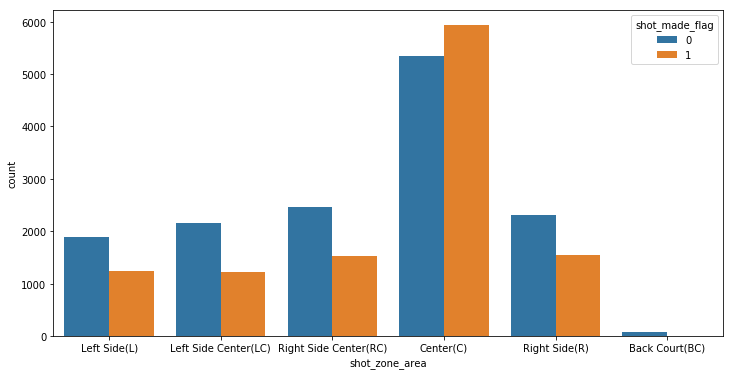

In [35]:
pylab.show()


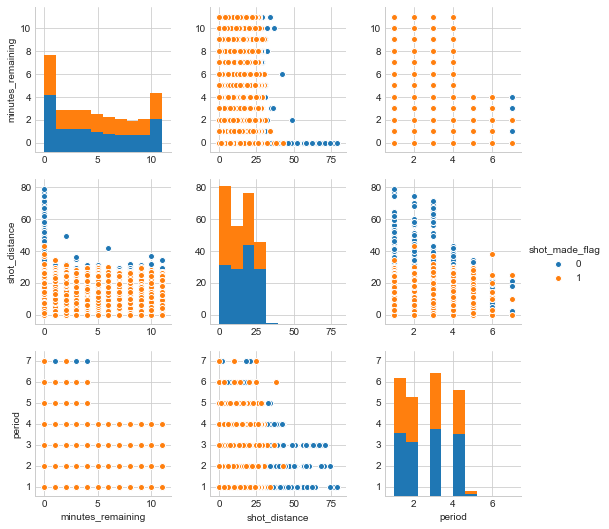

In [55]:
#Data Visualization: #6. Visualize relationships between attributes: Look at the attributes via scatter
#plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain
#any interesting relationships.#minutes_remaing, shot_distance, period
#sns.set_style('whitegrid')
sns.pairplot(df, vars=['minutes_remaining', 'shot_distance','period'], hue='shot_made_flag')
pylab.show()